## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('dataset/fake_job_postings.csv')

In [3]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.shape

(17880, 18)

## Feature Selection 

In [7]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [8]:
data = data[['title', 'location', 'company_profile', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
'required_experience', 'required_education', 'industry', 'function', 'salary_range','fraudulent']]

## Handling missing values & Outliers

In [9]:
# checking for duplicates 
data.duplicated().sum()

493

In [10]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [11]:
data_num = data[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]

data_categ = data[['title', 'location', 'company_profile', 'requirements', 'employment_type','required_experience', 'required_education', 'industry', 'function']]


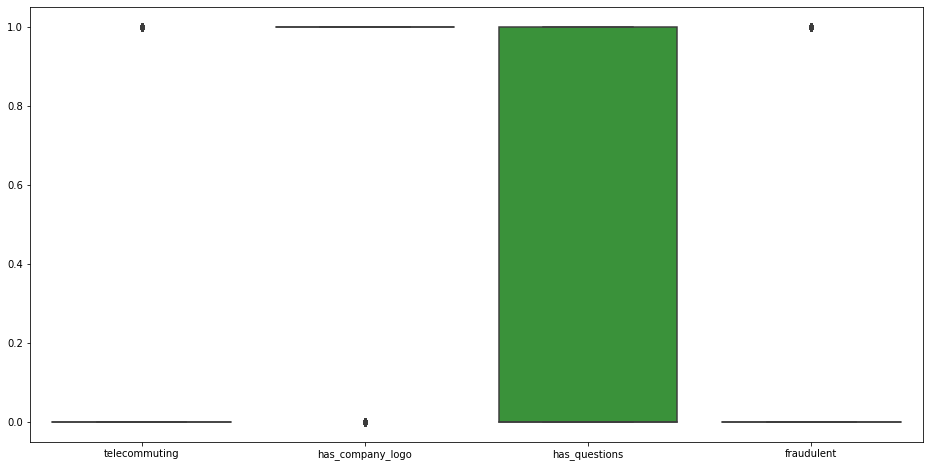

In [12]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data)
# plt.xticks(rotation=30)
plt.show()

In [13]:
# removing outliers

data_num = data_num[data_num['telecommuting'] < 0.9]
data_num = data_num[data_num['has_company_logo'] > 0.1]
data_num = data_num[data_num['fraudulent'] < 0.9]

data_num

,telecommuting,has_company_logo,has_questions,fraudulent,salary_range
0,0,1,0,0,NaN
1,0,1,0,0,NaN
2,0,1,0,0,NaN
3,0,1,0,0,NaN
4,0,1,1,0,NaN
...,...,...,...,...,...
17872,0,1,0,0,NaN
17873,0,1,0,0,NaN
17875,0,1,1,0,NaN
17876,0,1,1,0,NaN


In [14]:
data.isnull().sum()

title                      0
location                 340
company_profile         3255
requirements            2549
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3397
required_experience     6858
required_education      7889
industry                4769
function                6261
salary_range           14580
fraudulent                 0
dtype: int64

In [15]:
data.dropna(axis=0, how='any', inplace=True)

In [16]:
data.isnull().sum()

title                  0
location               0
company_profile        0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
salary_range           0
fraudulent             0
dtype: int64

In [17]:
data.shape

(1485, 14)

## EDA

In [18]:
data_categ.columns, data_num.columns

(Index(['title', 'location', 'company_profile', 'requirements',
        'employment_type', 'required_experience', 'required_education',
        'industry', 'function'],
       dtype='object'),
 Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent',
        'salary_range'],
       dtype='object'))

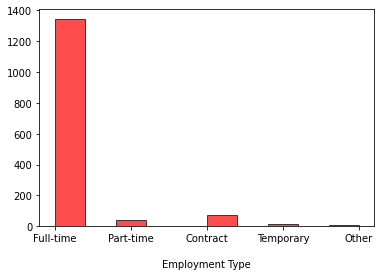

In [19]:
plt.hist(data.employment_type, color='red', edgecolor='black', alpha=0.7)
plt.xlabel('\nEmployment Type')
plt.show()


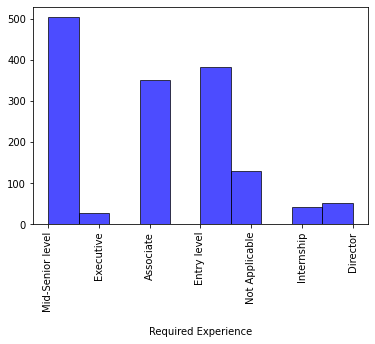

In [20]:
plt.hist(data.required_experience, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('\nRequired Experience')
plt.xticks(rotation=90)
plt.show()


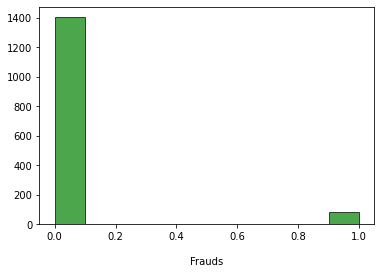

In [21]:
plt.hist(data.fraudulent, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('\nFrauds')
plt.show()


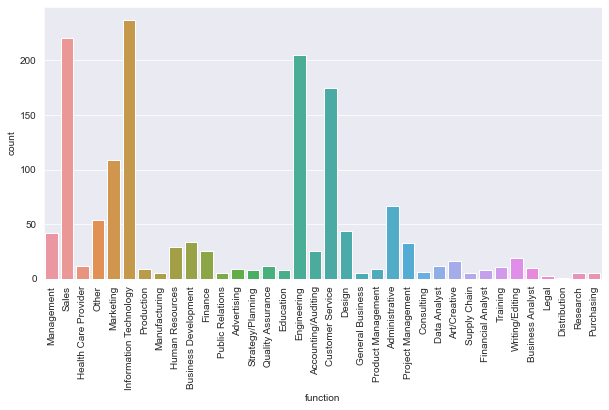

In [22]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.countplot(x='function' ,data=data)
plt.xticks(rotation=90)
plt.show()

In [23]:
data_jobs_fulltime = data[(data['employment_type'] == 'Full-time') & (data['fraudulent'] == 0)]
data_jobs_fulltime.shape

(1269, 14)

In [24]:
data_jobs_fulltime['title'].value_counts()

# Agent-Inbound Sales Position has the most opportunities (12) of a full-time job with no frauds.

Agent-Inbound Sales Position                                12
Marketing Manager                                            8
Customer Service Representative                              8
Account Manager                                              7
Technical Support Associate                                  7
                                                            ..
Sales Executive for Content Marketing Firm                   1
Wait Staff Position Available                                1
Graduate application - HW Design                             1
Senior Quant Analyst                                         1
Portfolio Development Associate - Paris & rest of France     1
Name: title, Length: 1027, dtype: int64

In [25]:
data_industry_mostfake = data[data['fraudulent'] == 1]
data_industry_mostfake.shape

(82, 14)

In [26]:
data_industry_mostfake['industry'].value_counts()

# Oil & Energy is the industry with the most fake jobs(19), followed by Real Estate(10).

Oil & Energy                            19
Real Estate                             10
Consumer Services                        8
Financial Services                       6
Computer & Network Security              5
Retail                                   4
Management Consulting                    3
Hospital & Health Care                   2
Accounting                               2
Telecommunications                       2
Hospitality                              2
Human Resources                          2
Biotechnology                            2
Insurance                                2
Transportation/Trucking/Railroad         2
Construction                             1
Defense & Space                          1
Computer Networking                      1
Mechanical or Industrial Engineering     1
Warehousing                              1
Media Production                         1
Information Services                     1
Logistics and Supply Chain               1
Security an

## Getting Balanced Dataset

In [27]:
data['fraudulent'].value_counts()

0    1403
1      82
Name: fraudulent, dtype: int64

In [28]:
fraud_jobs = data[data['fraudulent'] == 1]
real_jobs = data[data['fraudulent'] == 0]

fraud_jobs.shape ,real_jobs.shape

((82, 14), (1403, 14))

In [29]:
# oversampling 'fraud' dataframe for getting balanced dataset 
fraud_jobs = fraud_jobs.sample(1403 ,replace=True)

fraud_jobs.shape, real_jobs.shape

((1403, 14), (1403, 14))

In [30]:
data = fraud_jobs.append(real_jobs)
data.reset_index()

,index,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,6505,SECURITY OFFICER,"US, TX, AUSTIN",The Accion story began more than 100 years ag...,High School diploma or GED. One (1) year relat...,0,1,1,Full-time,Entry level,High School or equivalent,Security and Investigations,Customer Service,28000-32000,1
1,5838,UST Testing Technician III,"US, CA, Bakersfield, CA",Jaco Oil and Refined Resources have partnered ...,Responsibilities &amp; Position Requirements:T...,0,1,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,70000-80000,1
2,215,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",...,"QualificationsKnowledge, Skills &amp; Abiliti...",0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,95000-115000,1
3,8690,Payroll Clerk,"US, GA,",Basil Lifecare Pvt. Ltd. is a Wellness &amp; P...,• High school diploma or equivalent• Excellent...,0,0,0,Full-time,Entry level,High School or equivalent,Hospital & Health Care,Financial Analyst,35000-40000,1
4,17734,Customer Service Representative,"US, TX, Houston",Gary Cartwright established Cartwright Propert...,Home Computer with Internet AccessBasic Comput...,1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,30000-50000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,17439,Senior Trusts Manager,"GB, LND, Kingston upon Thames",VSO brings people together to fight poverty by...,The applicantVSO is looking for an individual ...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,International Trade and Development,Business Development,39000-41000,0
2802,17488,Management Accountant,"NZ, N, Auckland",PowerbyProxi and its customers are leading a r...,"Reporting to the CFO, the Management Accountan...",0,1,0,Contract,Mid-Senior level,Bachelor's Degree,Electrical/Electronic Manufacturing,Finance,100000-110000,0
2803,17515,Marketing manager,"GR, B, Thessaloniki",A vacation rental platform that will re-invent...,Perfect use of English and Greek language. Soc...,0,1,0,Part-time,Associate,Bachelor's Degree,"Leisure, Travel & Tourism",Marketing,5000-7000,0
2804,17849,Communication Designer,"US, CA, San Francisco",Balanced Labs exists to provide accountants an...,"Specifically, we’re looking for:5+ years of vi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,80000-100000,0


## Encoding 

In [31]:
data_categ.columns

Index(['title', 'location', 'company_profile', 'requirements',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [33]:
data['title'] = le.fit_transform(data['title'])
data['location'] = le.fit_transform(data['location'])
data['company_profile'] = le.fit_transform(data['company_profile'])
data['requirements'] = le.fit_transform(data['requirements'])
data['employment_type'] = le.fit_transform(data['employment_type'])
data['required_experience'] = le.fit_transform(data['required_experience'])
data['required_education'] = le.fit_transform(data['required_education'])
data['industry'] = le.fit_transform(data['industry'])
data['function'] = le.fit_transform(data['function'])
data['salary_range'] = le.fit_transform(data['salary_range'])


In [34]:
data.reset_index()
data.head()

,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
6505,875,393,326,533,0,1,1,1,2,4,81,7,241,1
5838,1139,230,194,895,0,1,1,1,5,2,63,23,446,1
215,499,231,440,1276,0,1,1,1,5,4,63,23,501,1
8690,764,284,66,1294,0,0,0,1,2,4,39,14,300,1
17734,238,408,161,544,1,1,0,1,2,4,75,7,270,1


In [35]:
data.shape

(2806, 14)

# Model Building

In [36]:
X = data[['title', 'location', 'company_profile', 'requirements','telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
'required_experience', 'required_education', 'industry', 'function',
'salary_range']].values 

y = data['fraudulent'].values


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1880, 13), (926, 13), (1880,), (926,))

## Logistic Regression 

In [38]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(solver='lbfgs', max_iter=3000)
lr.fit(X_train ,y_train)
y_predict_lr = lr.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score 
print('Accuracy score using Logistic Regression :',accuracy_score(y_test ,y_predict_lr))

Accuracy score using Logistic Regression : 0.7699784017278618


## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()

In [41]:
# choosing best number of neighbors for our model
neighbors_with_accuracies = {}

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train ,y_train)
    y_pred_knn = knn.predict(X_test)
    acc = accuracy_score(y_test ,y_pred_knn)
    neighbors_with_accuracies[i] = acc


In [42]:
neighbors_with_accuracies

{1: 0.9816414686825053,
 2: 0.9816414686825053,
 3: 0.9557235421166307,
 4: 0.9557235421166307,
 5: 0.9395248380129589,
 6: 0.9395248380129589,
 7: 0.91792656587473,
 8: 0.91792656587473,
 9: 0.906047516198704,
 10: 0.906047516198704,
 11: 0.8930885529157667,
 12: 0.8930885529157667,
 13: 0.8747300215982722,
 14: 0.8768898488120951,
 15: 0.8617710583153347,
 16: 0.8509719222462203,
 17: 0.8401727861771058,
 18: 0.8401727861771058,
 19: 0.8336933045356372}

In [43]:
max(neighbors_with_accuracies.values())

0.9816414686825053

In [44]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [45]:
y_predict_knn = knn.predict(X_test)
print("Accuracy Score using KNN:", accuracy_score(y_test, y_predict_knn))

Accuracy Score using KNN: 0.9816414686825053


## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()
rf.fit(X_train ,y_train)

RandomForestClassifier()

In [47]:
y_predict_rf = rf.predict(X_test)
print("Accuracy Score using Random Forest:", accuracy_score(y_test, y_predict_rf))


Accuracy Score using Random Forest: 0.9989200863930886


# Model Evaluation

In [48]:
# creating Dataframe to check which model was the best

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',  'Random Forest'],
    'Score': [accuracy_score(y_test, y_predict_lr),
            accuracy_score(y_test, y_predict_knn),
            accuracy_score(y_test, y_predict_rf),
            ]
    })

models.sort_values(by='Score', ascending=False)


,Model,Score
2,Random Forest,0.998920
1,KNN,0.981641
0,Logistic Regression,0.769978
